In [1]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np

In [2]:
def read_colors(path_in):
    """ Crappy little function to read in the text file defining the colors."""
    mycolors = []
    with open(path_in) as f_in:
        lines = f_in.readlines()
        for line in lines:
            line = line.lstrip()
            if line[0:5] == 'shade':
                mycolors.append(line.split("=")[1].strip())
    return mycolors

CM = read_colors('CM.txt')
CA = read_colors('CA.txt')
CD = ['#404040','#585858','#989898']

# Set the axes colors
matplotlib.rc('axes', edgecolor = CD[0], linewidth = 1.3)

In [3]:
Min,Ain,Bin=np.genfromtxt('samplecomp_full.csv',delimiter=',').T

In [4]:
nsamples = 20
ngamma= int(Ain.shape[0]/nsamples)
Ain = Ain.reshape(ngamma,nsamples)
Bin = Bin.reshape(ngamma,nsamples)
Min = Min.reshape(ngamma,nsamples)[:,0]

In [5]:
y1=0
y2=-1
A = Ain[y1:y2]
B = Bin[y1:y2]
M = Min[y1:y2]

m1=np.mean(A,axis=1)
min1=np.min(A,axis=1)
max1=np.max(A,axis=1)
std1=np.std(A,axis=1)
m2=np.mean(B,axis=1)
min2=np.min(B,axis=1)
max2=np.max(B,axis=1)
std2=np.std(B,axis=1)

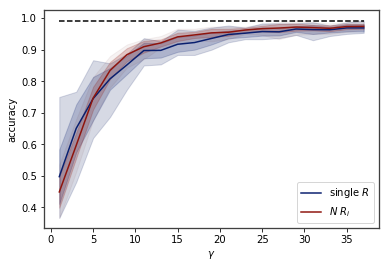

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
p1 = ax.plot(M,m1,CA[4], label = r'single $R$')
ax.fill_between(M,min1,max1,color=CA[2],alpha=.2)
ax.fill_between(M,m1-std1,m1+std1,color=CA[4],alpha=.2)
p2 = ax.plot(M,m2,CM[4], label = r'$N\ R_i$')
ax.fill_between(M,min2,max2,color=CM[2],alpha=0.05)
ax.fill_between(M,m2-std2,m2+std2,color=CM[4],alpha=0.2)
ax.plot(M,[.99 for i in range(len(M))],'k--')
ax.set_xlabel(r'$\gamma$')
ax.legend()
ax.set_ylabel('accuracy');

In [9]:
fig.savefig('sample.png',dpi=150)